In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [17]:
batteries = pd.read_csv("lithium-ion batteries.csv")
batteries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Materials Id           339 non-null    object 
 1   Formula                339 non-null    object 
 2   Spacegroup             339 non-null    object 
 3   Formation Energy (eV)  339 non-null    float64
 4   E Above Hull (eV)      339 non-null    float64
 5   Band Gap (eV)          339 non-null    float64
 6   Nsites                 339 non-null    int64  
 7   Density (gm/cc)        339 non-null    float64
 8   Volume                 339 non-null    float64
 9   Has Bandstructure      339 non-null    bool   
 10  Crystal System         339 non-null    object 
dtypes: bool(1), float64(5), int64(1), object(4)
memory usage: 26.9+ KB


### Features
- Materials Id: The unique ID of the material as stated on materialsproject.org
- Formula: Chemical formula of the material
- Spacegroup: ?
- Formation Energy (eV): ?
- E Above Hull (eV): Energy if decomposition of material into most stable ones
- Band Gap (eV): 
- Nsites: Number of atoms in the unit cell of the crystal
- Density (gm/cc)': The density of bulk crystalline materials
- Volume: The unit cell volume of the material
- Has Bandstructure: Boolean variable for bandstructure
### Target
- Crystal System: The targe variable

In [20]:
batteries.columns

Index(['Materials Id', 'Formula', 'Spacegroup', 'Formation Energy (eV)',
       'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites', 'Density (gm/cc)',
       'Volume', 'Has Bandstructure', 'Crystal System'],
      dtype='object')

In [18]:
batteries.head(5)

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [23]:
# Column names are uncomfortable, so i decided to rename them
mapper = {'Materials Id': 'mat_id',
'Formula': 'formula',
'Spacegroup': 'spacegroup',
'Formation Energy (eV)': 'form_e',
'E Above Hull (eV)': 'above_hull_e',
'Band Gap (eV)': 'band_gap_e',
'Nsites': 'n_sites',
'Density (gm/cc)': 'density',
'Volume': 'volume',
'Has Bandstructure': 'has_bandstr',
'Crystal System': 'crystal_system'}
df = batteries.rename(columns=mapper)
df.head(5)

,mat_id,formula,spacegroup,form_e,above_hull_e,band_gap_e,n_sites,density,volume,has_bandstr,crystal_system
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [126]:
target = df.columns[-1]

Let's start by visualizing the data with a few distribution plots.

monoclinic      139
orthorhombic    128
triclinic        72
Name: crystal_system, dtype: int64


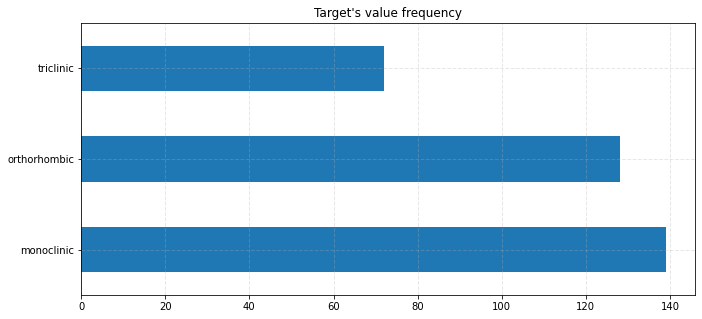

In [127]:
fig = plt.figure(figsize=(11,5))
df[target].value_counts().plot(kind='barh', )
plt.grid(visible=True, linestyle='--', linewidth=1, alpha=0.3)
plt.title("Target's value frequency")
print(df[target].value_counts())
plt.show()

As we can see, target classes present some imbalance.

Given we have 339 samples in total:

- 21.2% of samples are labeled as 'triclinic'
- 37.7% of samples are labeled as 'orthorhombic'
- 41.0% of samples are labeled as 'monoclinic'

This may influence model predictions, so we could consider some balancing techniques to mitigate this.

Let's now see some plots of numerical data present in our dataset

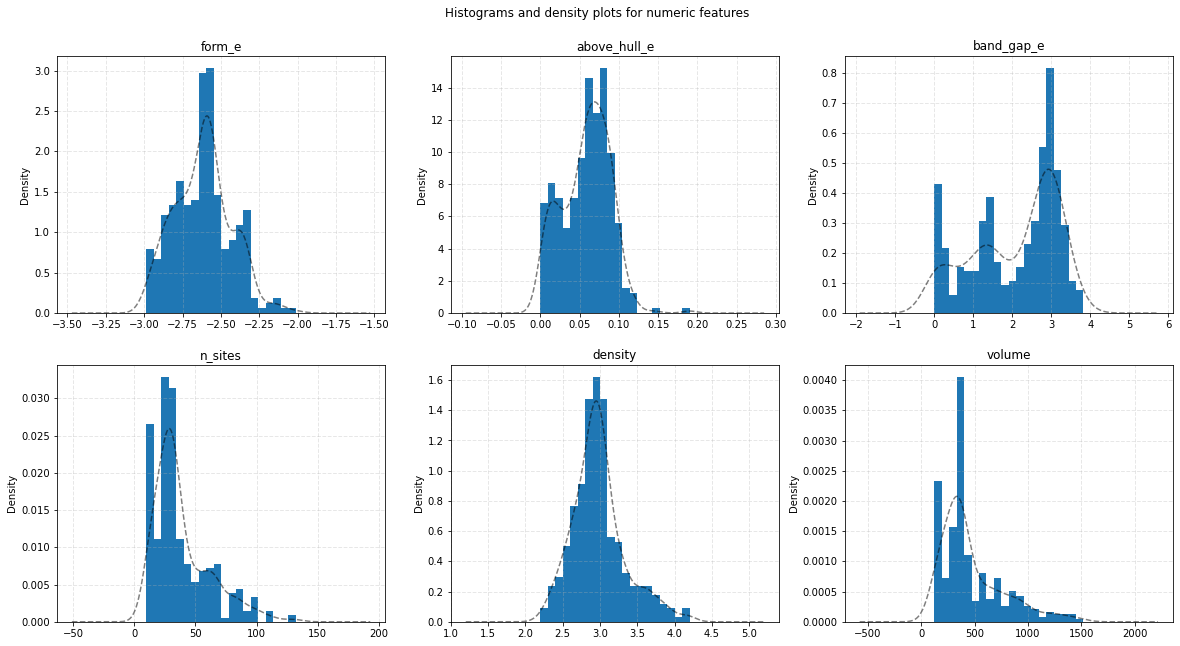

In [119]:
numerical = ['form_e', 'above_hull_e', 'band_gap_e', 'n_sites', 'density', 'volume']
fig = plt.figure(figsize=(20,15))
for i, ft in enumerate(numerical):
    ax = fig.add_subplot(3,3,i+1)
    ax.hist(df[ft], bins=20,density=True)
    df[ft].plot(kind='kde', style='k--', alpha=0.5)
    ax.set_title(numerical[i])
    plt.grid(visible=True, linestyle='--', linewidth=1, alpha=0.3)
fig.subplots_adjust(top=0.935)
fig.suptitle("Histograms and density plots for numeric features")
plt.show()

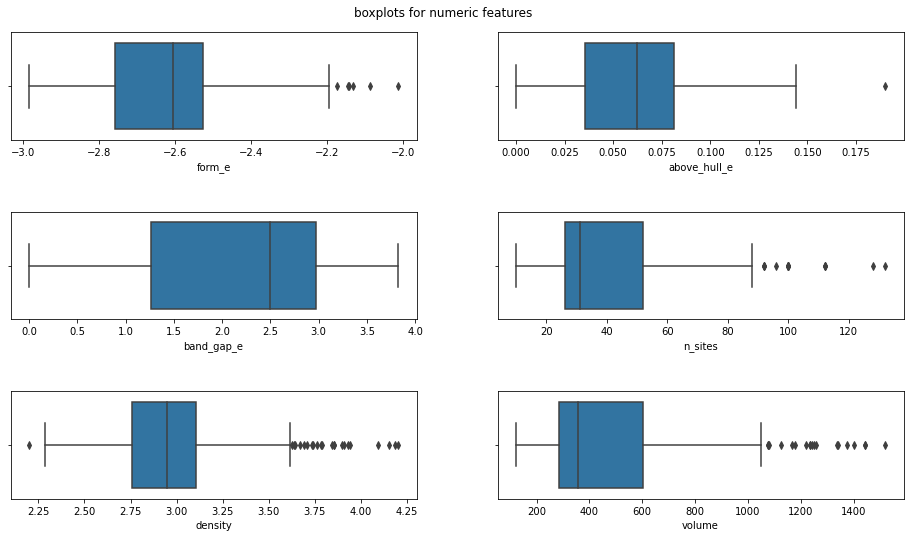

In [122]:
fig = plt.figure(figsize=(16,8))
for i, ft in enumerate(numerical):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=ft,data=df)
plt.subplots_adjust(hspace=2/3, top=0.935)
fig.suptitle("boxplots for numeric features")
plt.show()

Let's colorize the distribution using our target variable. 

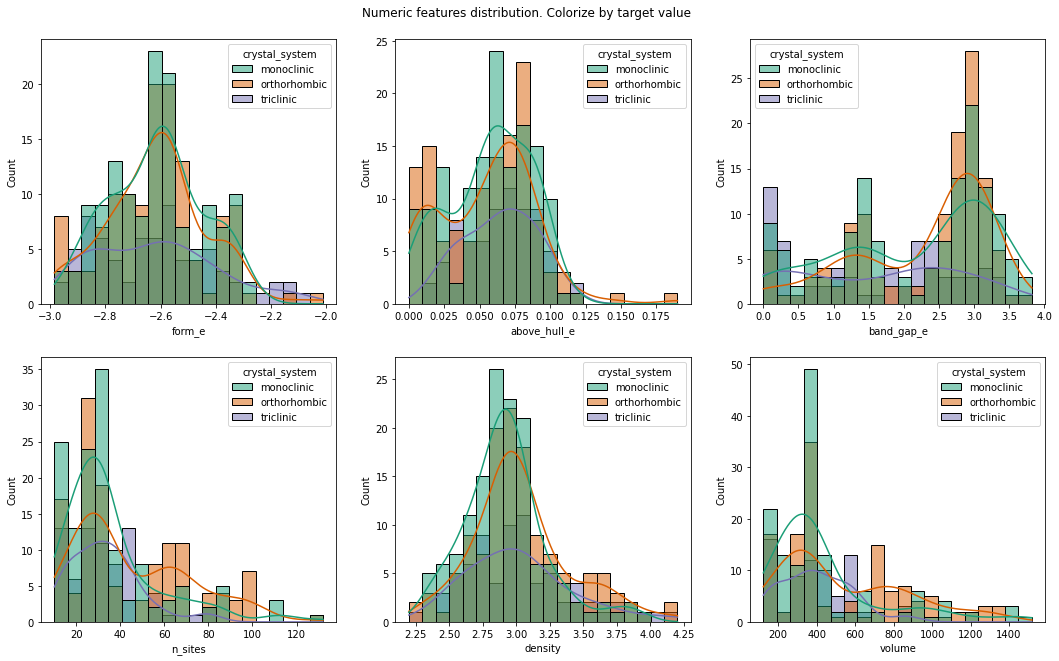

In [128]:
fig = plt.figure(figsize=(18,10))
for i, ft in enumerate(numerical):
    plt.subplot(2,3,i+1)
    sns.histplot(df,x=df[ft],hue=target,palette='Dark2',kde=True, bins=20)
fig.subplots_adjust(top=0.935)
fig.suptitle("Numeric features distribution. Colorize by target value")
plt.show()

### Observations
- Formation Energy (form_e): The downhill slopes to the right of the curve differ from triclinic while monoclinic and orthothombic have a slight rest. The latter is more prominent. monoclinic and triclinic have rests on the left of the slope. This could translate to a possible gaussian composition with three means for monoclinic, and two means for triclinic and orthorhombic
- E Above Hull (above_hull_e): Similarly to formation energy, there are rests to the left of the slope, but these are sharper, and form local maximums rather than rests. Howerver, this applies onlu to monoclinic and orthormbic. Triclinic does have a slight rest to the left but it does not generate a local maximum. 
- Band Gap (band_gap_e): It has a somewhat bimodal distribution for monoclinic and orthormbic, while triclinic seems uniform except for the lowest values, where it peaks higher than the other two classes. Note that triclinic is the class with fewer samples so this highlights the probability for low values in this feature for that label. 
- Nsites (n_sites): monoclinic and triclinic are somewhat normally distributed. Orthorhombic has a local maximum to the right of the slope, meaning it could be bi-modally distributed.  
- Density (density): The probability seems gaussian for all variables. There is a small rest to the right of the slope for orthormbic label.
- Volume (volume): Similar to density, all three labels distribute somewhat normally, and orthormbic label has a local maximum to the right of the slope. 

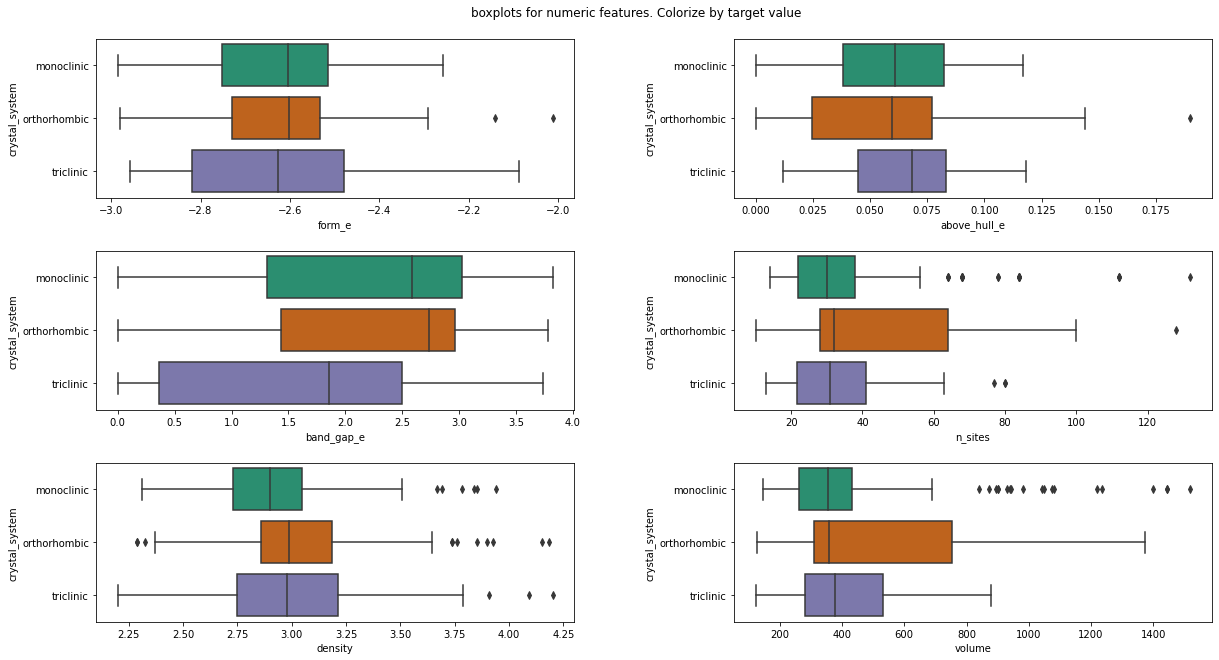

In [129]:
fig = plt.figure(figsize=(20,10))
for i, ft in enumerate(numerical):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df,x=df[ft],y=target,palette='Dark2')
fig.subplots_adjust(wspace=1/3, hspace=1/3, top=0.935)
fig.suptitle("boxplots for numeric features. Colorize by target value")
plt.show()

## Correlation